# Red Wine Quality Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')

In [3]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [5]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [7]:
data['quality'].value_counts()  #target column values

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

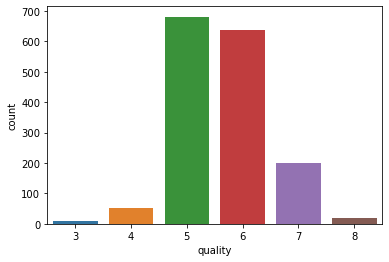

In [8]:
sns.countplot(x = 'quality', data = data)  #label column data visualization
plt.show()

# Data Visualization

In [9]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

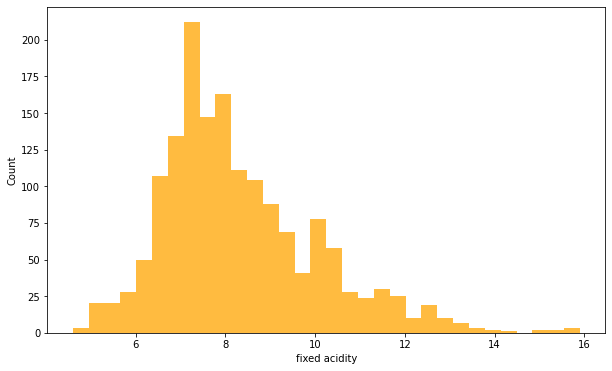

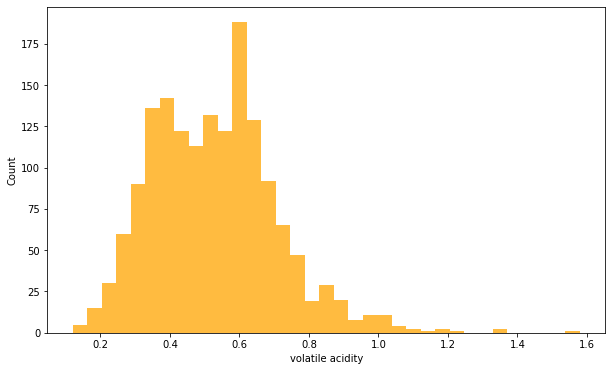

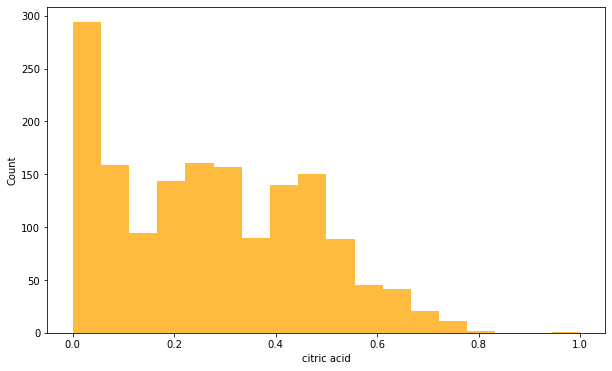

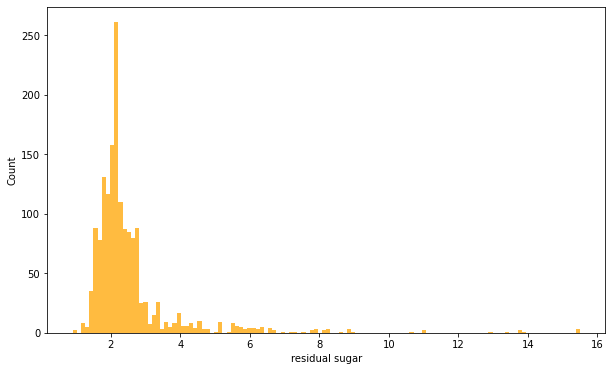

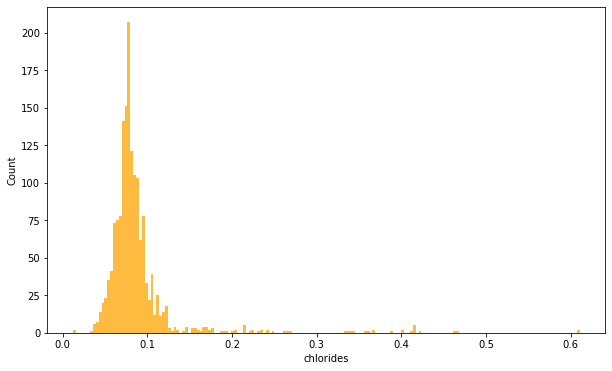

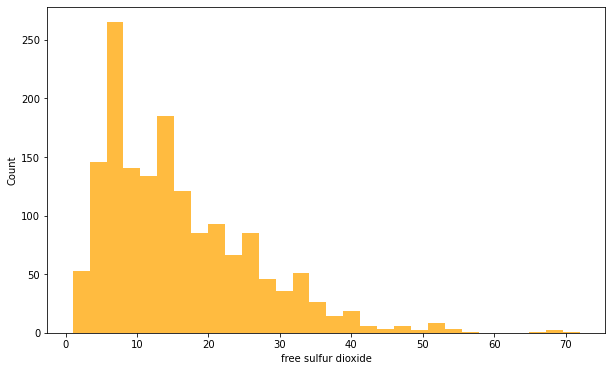

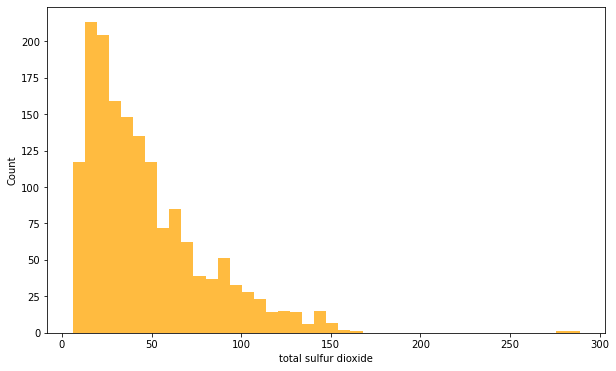

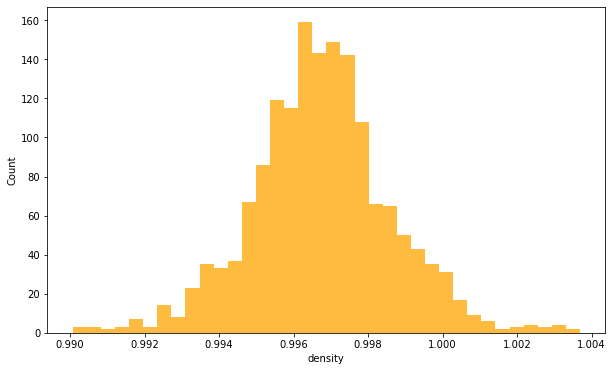

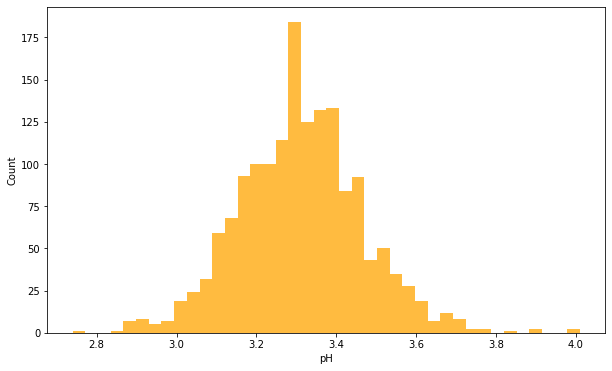

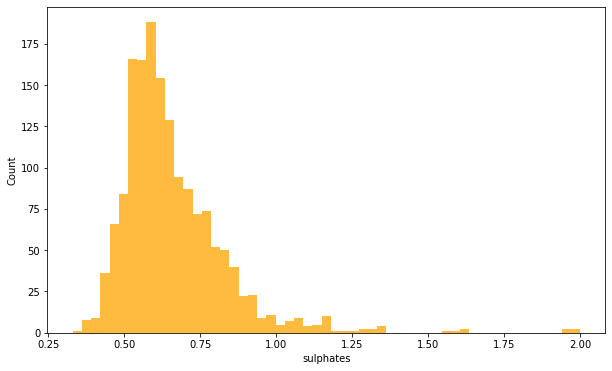

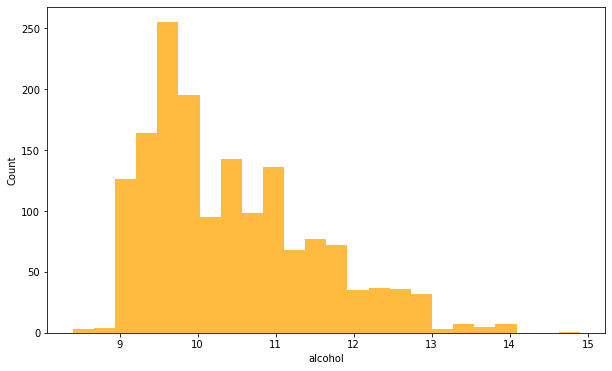

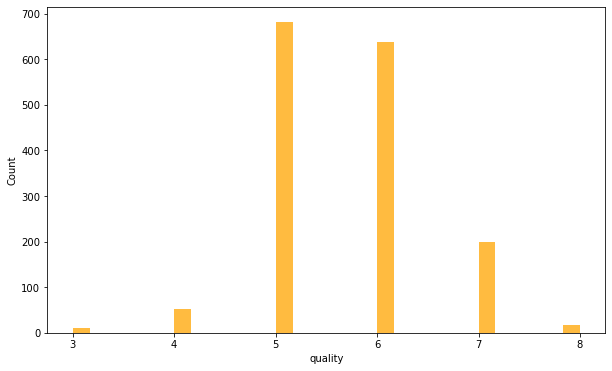

In [10]:
df = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

#plt.figure(figsize = (10,6))
for i in df:
    plt.figure(figsize = (10,6))
    sns.histplot(x = i,data = data, color = 'Orange',edgecolor='none')
    plt.show()

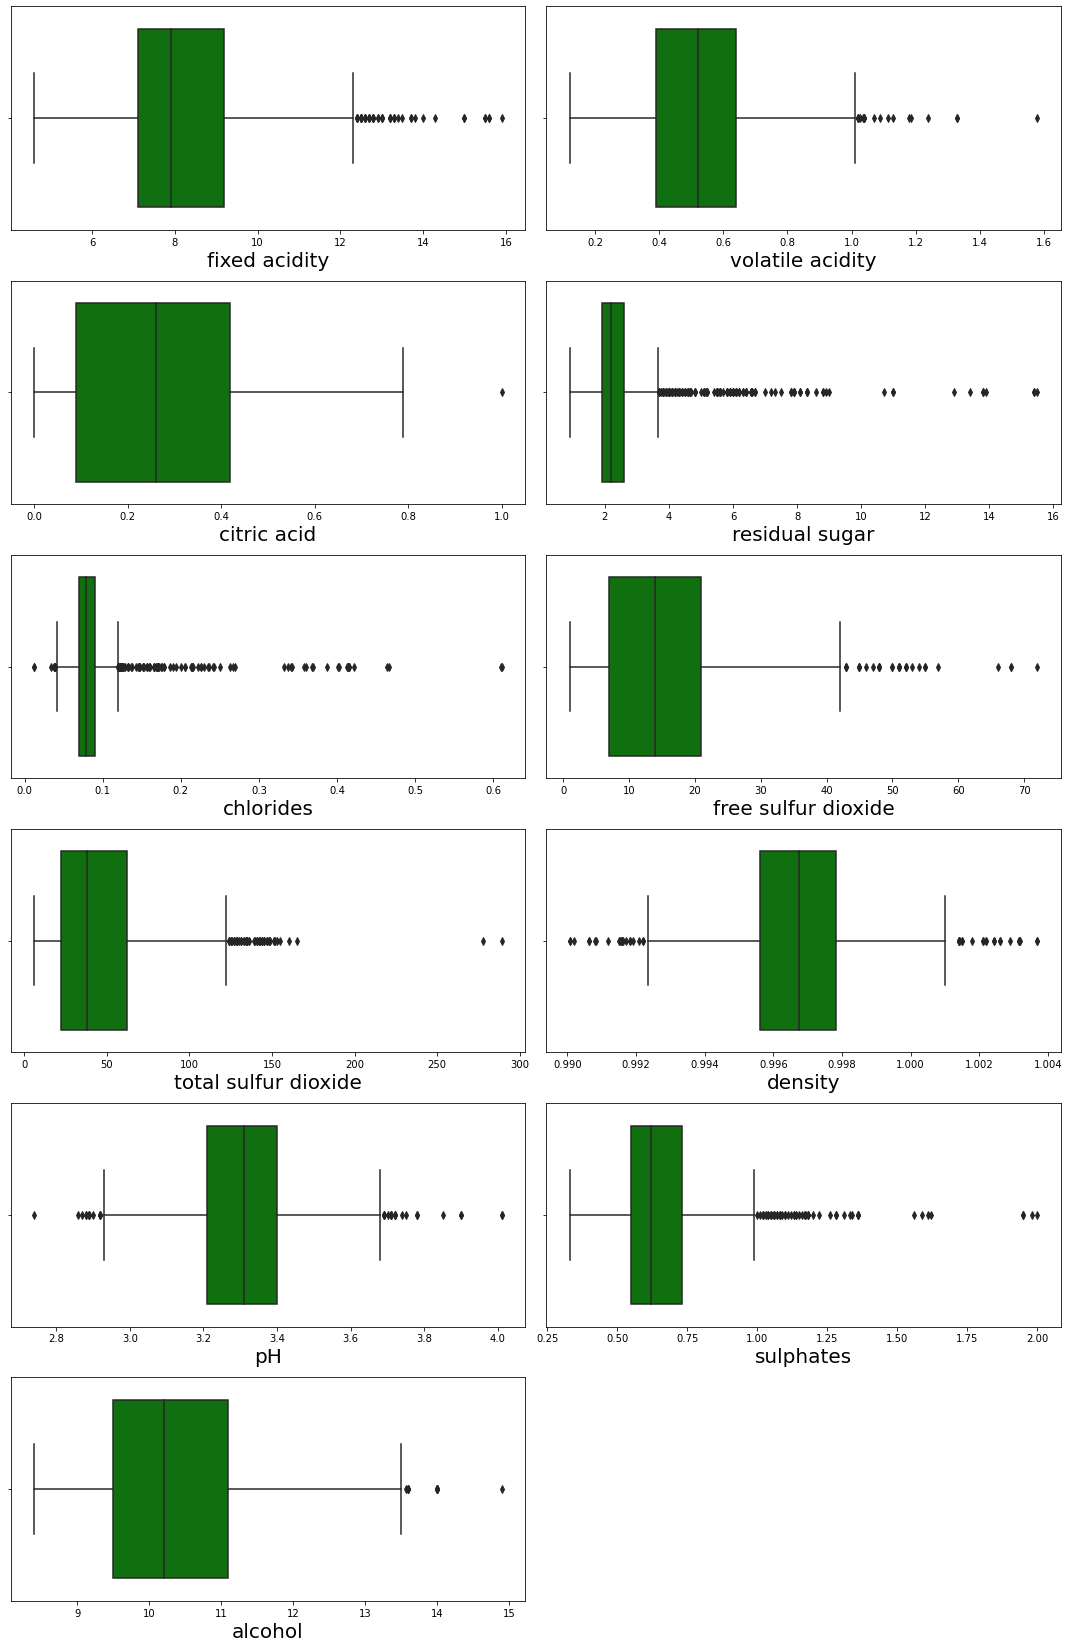

In [11]:

plt.figure(figsize = (15,23))
plotnumber=1

for column in data:
    if plotnumber<12:
        ax=plt.subplot(6,2,plotnumber)
        sns.boxplot(data[column],color = 'Green')
        plt.xlabel(column,fontsize=20)
    plotnumber +=1

plt.tight_layout()

### Applying IQR Method


In [12]:
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3-Q1

data_new1 = data[~((data < (Q1-1.5*IQR)) | (data> (Q3 + 1.5*Q3))).any(axis = 1)]


In [13]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new1.shape)
print('Percentage Loss'.ljust(20),":",(data.shape[0]-data_new1.shape[0])/data.shape[0])

Shape - Before and After:

Shape Before         : (1599, 12)
Shape After          : (1479, 12)
Percentage Loss      : 0.075046904315197


### Applying Z-Score Method

In [14]:
#importing libraries

from scipy.stats import zscore

In [15]:
z=np.abs(zscore(data))
threshold = 3
data_new2 = data[(z<3).all(axis=1)]

In [16]:
print('Shape - Before and After:\n')
print('Shape Before'.ljust(20),":",data.shape)
print('Shape After'.ljust(20),":",data_new2.shape)
print('Percentage Loss'.ljust(20),":",(data.shape[0]-data_new2.shape[0])/data.shape[0])

Shape - Before and After:

Shape Before         : (1599, 12)
Shape After          : (1451, 12)
Percentage Loss      : 0.09255784865540963


- IQR method helps us with less percentage loss when compared to zscore method

### Correlation between features v/s features

- using heatmap

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

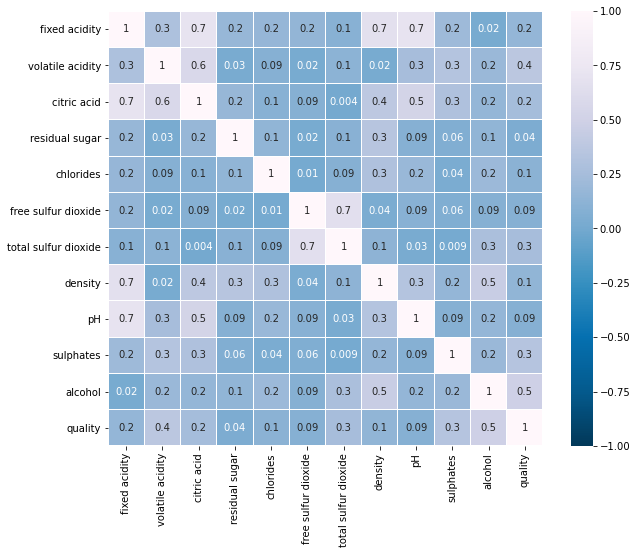

In [17]:
data_corr = data_new1.corr().abs()#to get the correlation values
plt.figure(figsize=(10,8))

sns.heatmap(data_corr,vmin=-1,vmax=1,annot=True,square=True,center=0,fmt='.1g',linewidth=0.01,cmap = 'PuBu_r')
plt.tight_layout

##### Observation:

- Features largely correlated: 

    'density' is more largely correlated to 'fixed density'
    
    'PH' is more largely correlated to 'fixed density'
    
    'critic acid' is more largely correlated to 'fixed density'
    

- Features minorly correlated: 
    
    'sulphates' and 'free sulfur dioxide' are with minor correlation

- we see that correlation between features are not more than 0.9

### Divide Quality Range:

- Good Quality: 7-10

- Bad Quality:  0-6


In [18]:
data_new1['Wine_Quality'] = np.where(data_new1['quality'] >=7, 1, 0)

data_new1['Wine_Quality'].value_counts()

0    1282
1     197
Name: Wine_Quality, dtype: int64

# Splitting features and label

In [19]:
X = data_new1.drop(['quality','Wine_Quality'], axis = 1)
Y = data_new1['Wine_Quality']

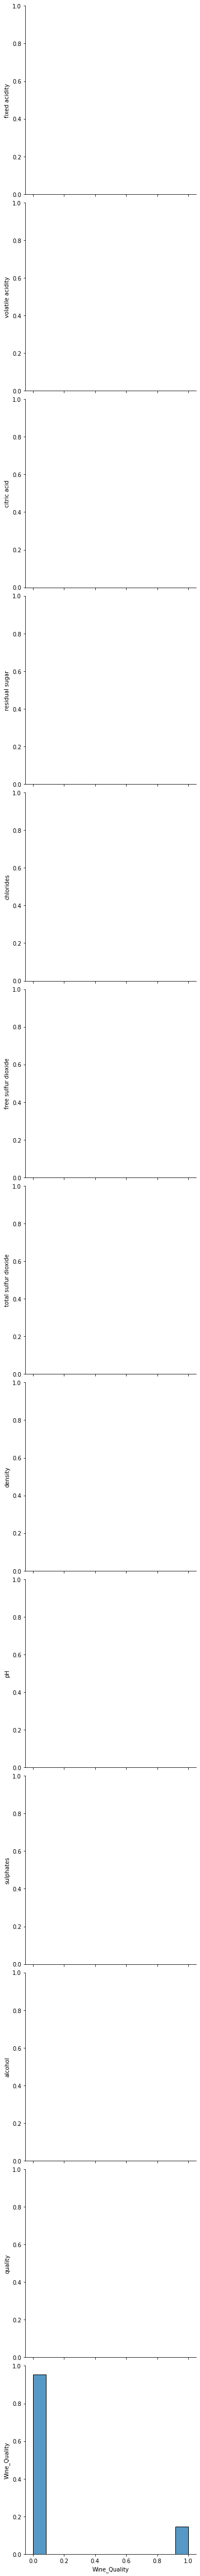

In [20]:
sns.pairplot(data=data_new1, kind='rel', size = 5,
                  x_vars=['Wine_Quality'],
                  y_vars=['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar','chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density','pH', 'sulphates', 'alcohol', 'quality', 'Wine_Quality'])

# Splitting train and test data

In [21]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [22]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.15, random_state=5) #not applying scaled data
y_train.sample(5)

280     0
792     0
1532    0
710     0
851     0
Name: Wine_Quality, dtype: int32

In [23]:
data_new1['Wine_Quality'].value_counts()

0    1282
1     197
Name: Wine_Quality, dtype: int64

# MODEL BUILDING:

## Model1 : LogisticRegression

In [119]:
from sklearn.linear_model import LogisticRegression
Log_Reg = LogisticRegression()
Log_Reg.fit(x_train,y_train)
y_pred = Log_Reg.predict(x_test)


##### Accuracy Score

In [120]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(y_test,y_pred))
s11 = accuracy_score(y_test,y_pred)


from sklearn.metrics import r2_score,mean_squared_error

print('Mean_Squared_Error: ',mean_squared_error(y_test,y_pred))
print('R2_Score: ',r2_score(y_test,y_pred))




Accuracy Score: 0.8963963963963963
Mean_Squared_Error:  0.1036036036036036
R2_Score:  0.0301994301994305


##### Cross Validation

In [149]:
#import library
from sklearn.model_selection import cross_val_score
print("Cross Validation Score: ", cross_val_score(Log_Reg,X,Y,cv=3))

print('Avg_Cross_Validation Score: ',cross_val_score(Log_Reg,X,Y,cv=3).mean())
CV1 = cross_val_score(Log_Reg,X,Y,cv=3).mean()

Cross Validation Score:  [0.87221095 0.89655172 0.87423935]
Avg_Cross_Validation Score:  0.8810006761325221


In [122]:
cnf_mat1 = confusion_matrix(y_test,y_pred)
cnf_mat1

array([[191,   4],
       [ 19,   8]], dtype=int64)

In [123]:
pip install scikit-plot

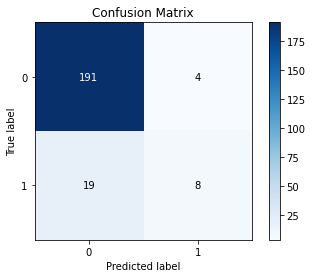

In [124]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred)
plt.show()

In [191]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94       195
           1       0.67      0.30      0.41        27

    accuracy                           0.90       222
   macro avg       0.79      0.64      0.68       222
weighted avg       0.88      0.90      0.88       222



## Model2 : RandomForestClassifier

In [125]:
from sklearn.ensemble import RandomForestClassifier

Rand_C = RandomForestClassifier(random_state = 3)
Rand_C.fit(x_train,y_train)
y_pred2 = Rand_C.predict(x_test)


##### Accuracy Score

In [126]:
from sklearn.metrics import r2_score,mean_squared_error

print('Mean_Squared_Error: ',mean_squared_error(y_test,y_pred2))
print('R2_Score: ',r2_score(y_test,y_pred2))

print('Accuracy Score: ',accuracy_score(y_test,y_pred2))
s21 = accuracy_score(y_test,y_pred2)

Mean_Squared_Error:  0.08558558558558559
R2_Score:  0.1988603988603992
Accuracy Score:  0.9144144144144144


##### Cross Validation Score

In [148]:
#import library
from sklearn.model_selection import cross_val_score
print("Cross Validation Score: ", cross_val_score(Rand_C,X,Y,cv=3))

print('Avg_Cross_Validation Score: ',cross_val_score(Rand_C,X,Y,cv=3).mean())
CV2 = cross_val_score(Rand_C,X,Y,cv=3).mean()

Cross Validation Score:  [0.88438134 0.87829615 0.87221095]
Avg_Cross_Validation Score:  0.8782961460446247


In [128]:
confusion_matrix(y_test,y_pred2)

array([[192,   3],
       [ 16,  11]], dtype=int64)

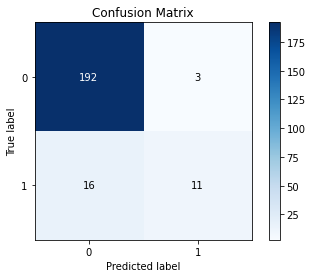

In [129]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred2)
plt.show()

##### Classification Report

In [192]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       195
           1       0.79      0.41      0.54        27

    accuracy                           0.91       222
   macro avg       0.85      0.70      0.74       222
weighted avg       0.91      0.91      0.90       222



## Model3 : Decision Tree

In [131]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
y_pred4 = dtc.predict(x_test)


##### Accuracy Score

In [133]:
from sklearn.metrics import r2_score,mean_squared_error

print('Mean_Squared_Error: ',mean_squared_error(y_test,y_pred4))
print('R2_Score: ',r2_score(y_test,y_pred4))

print('Accuracy Score: ', accuracy_score(y_test,y_pred4))

s31 = accuracy_score(y_test,y_pred4)

Mean_Squared_Error:  0.1036036036036036
R2_Score:  0.0301994301994305
Accuracy Score:  0.8963963963963963


##### Cross Validation Score

In [147]:
#import library
from sklearn.model_selection import cross_val_score
print("Cross Validation Score: ", cross_val_score(dtc,X,Y,cv=3))

print('Avg_Cross_Validation Score: ',cross_val_score(dtc,X,Y,cv=3).mean())
CV3 = cross_val_score(dtc,X,Y,cv=3).mean()

Cross Validation Score:  [0.84584178 0.80730223 0.77079108]
Avg_Cross_Validation Score:  0.8147396889790399


In [135]:
confusion_matrix(y_test,y_pred4)

array([[186,   9],
       [ 14,  13]], dtype=int64)

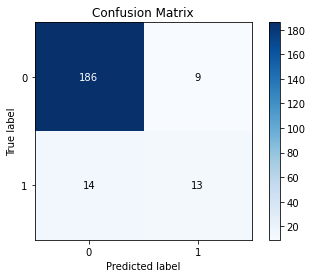

In [136]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred4)
plt.show()

##### Classification Report

In [193]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       195
           1       0.59      0.48      0.53        27

    accuracy                           0.90       222
   macro avg       0.76      0.72      0.74       222
weighted avg       0.89      0.90      0.89       222



## Model4 : SVC 

In [137]:
from sklearn.svm import SVC
sv = SVC()
sv.fit(x_train,y_train)
y_pred6 = sv.predict(x_test)


##### Accuracy Score

In [160]:
from sklearn.metrics import r2_score,mean_squared_error

print('Mean_Squared_Error: ',mean_squared_error(y_test,y_pred6))

print("Accuracy Score:",accuracy_score(y_test,y_pred6))

s41 = accuracy_score(y_test,y_pred6)

Mean_Squared_Error:  0.12162162162162163
Accuracy Score: 0.8783783783783784


##### Cross Validation Score

In [146]:
#import library
from sklearn.model_selection import cross_val_score
print("Cross Validation Score: ", cross_val_score(sv,X,Y,cv=3))

print('Avg_Cross_Validation Score: ',cross_val_score(sv,X,Y,cv=3).mean())
CV4 = cross_val_score(sv,X,Y,cv=3).mean()

Cross Validation Score:  [0.86815416 0.86612576 0.86612576]
Avg_Cross_Validation Score:  0.8668018931710616


In [140]:
confusion_matrix(y_test,y_pred6)

array([[195,   0],
       [ 27,   0]], dtype=int64)

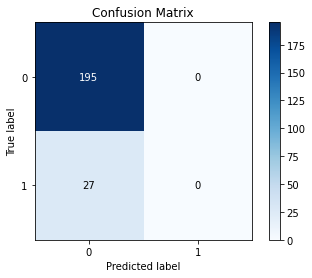

In [141]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred6)
plt.show()

##### Classification Report

In [194]:
print(classification_report(y_test,y_pred6))

              precision    recall  f1-score   support

           0       0.88      1.00      0.94       195
           1       0.00      0.00      0.00        27

    accuracy                           0.88       222
   macro avg       0.44      0.50      0.47       222
weighted avg       0.77      0.88      0.82       222



## Model5: KnnClassifier

In [164]:
from sklearn.neighbors import KNeighborsClassifier


In [165]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
y_pred8=knn.predict(x_test)


##### Accuracy Score

In [169]:
from sklearn.metrics import r2_score,mean_squared_error

print('Mean_Squared_Error: ',mean_squared_error(y_test,y_pred8))
print("Accuracy Score:",accuracy_score(y_test,y_pred8))

s51 = accuracy_score(y_test,y_pred8)

Mean_Squared_Error:  0.14864864864864866
Accuracy Score: 0.8513513513513513


##### Cross Validation Score

In [167]:
#import library
from sklearn.model_selection import cross_val_score
print("Cross Validation Score: ", cross_val_score(knn,X,Y,cv=3))

print('Avg_Cross_Validation Score: ',cross_val_score(knn,X,Y,cv=3).mean())
CV5 = cross_val_score(knn,X,Y,cv=3).mean()

Cross Validation Score:  [0.85801217 0.84178499 0.85192698]
Avg_Cross_Validation Score:  0.8505747126436782


In [170]:
confusion_matrix(y_test,y_pred8)

array([[183,  12],
       [ 21,   6]], dtype=int64)

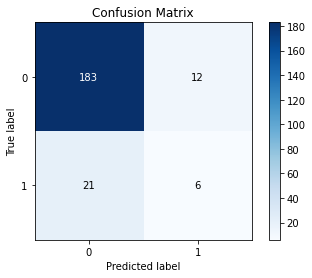

In [172]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred8)
plt.show()

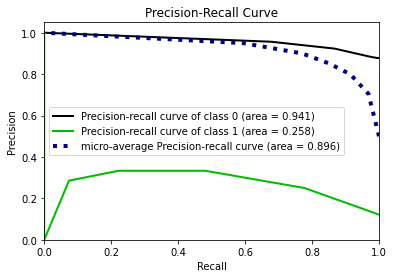

In [196]:
import matplotlib.pyplot as plt
import scikitplot as skplt
# This is a RandomForest classifier. We'll generate probabilities on the test set.
knn.fit(x_train, y_train)
probas = knn.predict_proba(x_test)
# Now plot.
skplt.metrics.plot_precision_recall_curve(y_test, probas)

plt.show()

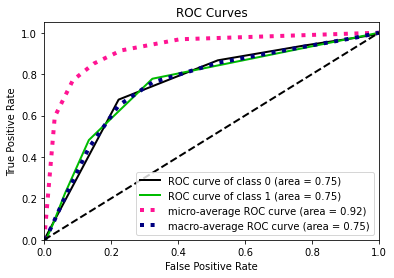

In [199]:
import matplotlib.pyplot as plt
import scikitplot as skplt
# This is a RandomForest classifier. We'll generate probabilities on the test set.
knn.fit(x_train, y_train)
probas = knn.predict_proba(x_test)
# Now plot.
skplt.metrics.plot_roc(y_test, probas)

plt.show()

##### Classification Report

In [195]:
print(classification_report(y_test,y_pred8))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       195
           1       0.33      0.22      0.27        27

    accuracy                           0.85       222
   macro avg       0.62      0.58      0.59       222
weighted avg       0.83      0.85      0.84       222



_______________________________________________

# Finding Best Model

In [173]:
Overall_Score = pd.DataFrame({'Model':['Logistic Regression','Random Forest Classifier','Decision Tree','SVC','KnnClassifier'],'Accuracy_Score':[s11,s21,s31,s41,s51],'Cross_Validation_Score':[CV1,CV2,CV3,CV4,CV5]})

Overall_Score['Difference'] = Overall_Score['Accuracy_Score'] - Overall_Score['Cross_Validation_Score']

In [174]:
Overall_Score

,Model,Accuracy_Score,Cross_Validation_Score,Difference
0,Logistic Regression,0.896396,0.881001,0.015396
1,Random Forest Classifier,0.914414,0.878296,0.036118
2,Decision Tree,0.896396,0.812035,0.084361
3,SVC,0.878378,0.866802,0.011576
4,KnnClassifier,0.851351,0.850575,0.000777


In [175]:
Overall_Score['Difference'].min()

0.000776638707673083

In [176]:
Overall_Score[Overall_Score['Difference'] == 0.000776638707673083]

,Model,Accuracy_Score,Cross_Validation_Score,Difference
4,KnnClassifier,0.851351,0.850575,0.000777


### Best Model: KnnClassifier

##### Hyper Parameter Tuning Using GridSearchCV

In [180]:
param_grid={'algorithm': ['kd_tree', 'brute'],
 'leaf_size': [15, 18, 20],
 'n_neighbors': [3, 5, 7, 13]}

In [181]:
gridsearch=GridSearchCV(estimator=knn,param_grid=param_grid)


In [182]:
gridsearch.fit(x_train,y_train)


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree', 'brute'],
                         'leaf_size': [15, 18, 20],
                         'n_neighbors': [3, 5, 7, 13]})

In [183]:
gridsearch.best_params_


{'algorithm': 'kd_tree', 'leaf_size': 15, 'n_neighbors': 13}

In [185]:
KNN = KNeighborsClassifier(algorithm='kd_tree',leaf_size=15,n_neighbors=13)
KNN.fit(x_train,y_train)
y_pred9 = KNN.predict(x_test)

## Accuracy Score

In [186]:
print("Accuracy Score:",accuracy_score(y_test,y_pred9)) #Accuracy Score after tuning

Accuracy Score: 0.8738738738738738


## Classification Report

In [187]:
from sklearn.metrics import confusion_matrix,classification_report

In [188]:
print(classification_report(y_test,y_pred9))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93       195
           1       0.40      0.07      0.12        27

    accuracy                           0.87       222
   macro avg       0.64      0.53      0.53       222
weighted avg       0.83      0.87      0.83       222



## Confusion Matrix

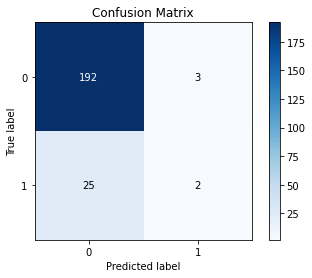

In [189]:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(y_test,y_pred9)
plt.show()

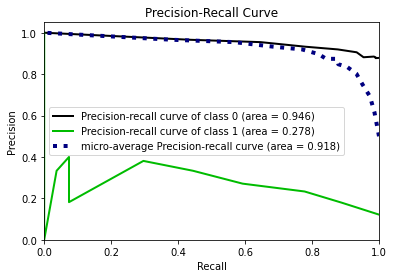

In [197]:
import matplotlib.pyplot as plt
import scikitplot as skplt
# This is a knn classifier after tuning. We'll generate probabilities on the test set.
KNN.fit(x_train, y_train)
probas = KNN.predict_proba(x_test)
# Now plot.
skplt.metrics.plot_precision_recall_curve(y_test, probas)

plt.show()

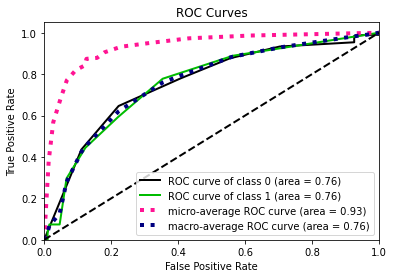

In [198]:
import matplotlib.pyplot as plt
import scikitplot as skplt
# This is a RandomForest classifier. We'll generate probabilities on the test set.
KNN.fit(x_train, y_train)
probas = KNN.predict_proba(x_test)
# Now plot.
skplt.metrics.plot_roc(y_test, probas)

plt.show()

# Saving the model for future prediction:

In [200]:
import pickle


In [203]:
RedWine_Knn='RedWine_Quality_Prediction__model.pickle'
pickle.dump(KNN,open(RedWine_Knn,'wb'))


________________________________________

### If our model predicts value as '0' that means, Red_Wine Quality is bad


### If our model predicts value as '1' that means, Red_Wine Quality is good

Good Quality: 7-10

Bad Quality: 0-6